*ADS-A Proftask - Group B*

# Data Analysis: Informa

## Introduction

For this project it is expected that we can show where the money is in the data. Therefore questions like, where the organizations improve or how to increase the upsell could be answered when analyzing the data. Comparisons could also be useful, so we could show which pharmacists are underachieving compared to others and why.

The objective for this project is to give insight to the pharmacist. To do so, we are going to analyse the dataset. Our goal for the pharmacist is to be prepared for the particular “illness season”, so not only that the pharmacist can be prepared for the amount of medications but also to be able to improve their services for their patients during that season. To do so, analyzing the most sold medicine we can understand what illness appears the most in the region by the season
of the year. 

## 1.Loading Libraries

The first thing we do is import all the neccessary libraries that are going to be used to analyse the data.

In [1]:
import numpy as np
import datetime
import pandas as pd
import pylab as pyl

import matplotlib as mpl
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline 

## 2.Loading CSV Data 

With the code below we can import the csv files to the notebook. After reading the CSV files, we merge the CSV files together.

In [2]:
df1 = pd.read_csv('../input/informadataset/ds-1.csv')
df2 = pd.read_csv('../input/informadataset/ds-2.csv')
df3 = pd.read_csv('../input/informadataset/ds-3.csv')
df4 = pd.read_csv('../input/informadataset/ds-4.csv')
df5 = pd.read_csv('../input/informadataset/ds-5.csv')
df6 = pd.read_csv('../input/informadataset/ds-6.csv')
df7 = pd.read_csv('../input/informadataset/ds-7.csv')
df8 = pd.read_csv('../input/informadataset/ds-8.csv')
df9 = pd.read_csv('../input/informadataset/ds-9.csv')

## 3.Data Merging

In the code below, we are going to merge all of our files together and put it into one dataframe.

In [3]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
df_all = pd.concat(frames)

df_all.columns = ['Delivery date','Delivery time','Pharmacy number','Pharmacy postcode','YOB','Gender','CNK','Product name','ATC code','Unit','Price','Contribution']

## 4.Data Cleaning

In these codes below, we are going to clean our dataset to make it more useful to work with. 
### 4.1.Gender Number Replacement

We noticed, that genders were given in numbers. There were 4 numbers. We therefore assumed that 1 would be male and 2 would be female. 0 and 3 are in this case identified as unknown. We are not focussing on the unknown gender and therefore dropping the rows containing gender number 0 and 3. 

In [4]:
df_gend = ((df_all['Gender'] == 0) | (df_all['Gender'] == 3))
df_all.drop (df_all[df_gend].index, inplace=True)
df_all.reset_index(drop=True,inplace=True)

In [5]:
df_all['Gender'].value_counts()

2    12714051
1     9311785
Name: Gender, dtype: int64

In [6]:
df_all['Gender'].replace([1], 'Male', inplace = True)
df_all['Gender'].replace([2], 'Female', inplace = True)

As we see below, females would more likely medications more than males.

In [7]:
df_all['Gender'].value_counts()

Female    12714051
Male       9311785
Name: Gender, dtype: int64

### 4.2.Change Delivery Date & Time

Now we are going to change the delivery date and time since the data type is an object. We are going to convert it into datetime

In [8]:
df_all['Delivery time'].replace('?', np.NaN)
df_all['Delivery time'].value_counts()

00:00    3317485
10:05      38797
10:07      38458
10:14      38151
10:59      38011
          ...   
04:07          1
06:16          1
05:05          1
06:48          1
04:47          1
Name: Delivery time, Length: 1410, dtype: int64

In [9]:
df_all['DateTime'] = pd.to_datetime(df_all['Delivery date'] + ' ' + df_all['Delivery time'])
df_all['DateTime'].value_counts()

2019-04-30 00:00:00    17499
2019-04-29 00:00:00    17092
2019-05-27 00:00:00    17040
2019-12-23 00:00:00    16991
2019-11-25 00:00:00    16988
                       ...  
2018-09-29 14:57:00        1
2017-04-24 13:41:00        1
2018-10-04 00:35:00        1
2017-10-27 19:42:00        1
2018-06-27 20:18:00        1
Name: DateTime, Length: 642592, dtype: int64

In [10]:
df_all.head(5)

,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Unit,Price,Contribution,DateTime
0,01/01/2017,00:00,7341765,21,1922,Male,5520523,WACHTHONORARIUM,,0,4.90,0.00,2017-01-01
1,01/01/2017,00:00,7341765,21,1925,Male,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,2017-01-01
2,01/01/2017,00:00,8272695,16,1932,Female,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,2017-01-01
3,01/01/2017,00:00,8272695,16,1933,Female,5520523,WACHTHONORARIUM,,0,4.90,0.00,2017-01-01
4,01/01/2017,00:00,9111423,10,1931,Male,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,2017-01-01


### 4.3.Season Category

To make some good visuals with the seasons we first have to extract the seasons from the DateTime column, which was made from the delivery dates and delivery times. This has been done with pd.cut.

Source: https://stackoverflow.com/questions/60285557/extract-seasons-from-datetime-pandas

After making the column for the seasons we want to see if it was successfully executed. This is why we count the values by season to see is all season are made and what season has the most deliveries.

In [11]:
df_all['date_offset'] = (df_all['DateTime'].dt.month * 100 + df_all['DateTime'].dt.day - 320) % 1300
df_all['Season'] = pd.cut(df_all['date_offset'], [0, 300, 602, 900, 1300], labels = ['Spring', 'summer', 'autumn', 'winter'])
df_all['Season'].value_counts()
df_all.tail(5)

,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Unit,Price,Contribution,DateTime,date_offset,Season
22025831,12/31/2019,23:56,7068483,90,1963,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00,911.0,winter
22025832,12/31/2019,23:56,7068483,90,1962,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00,911.0,winter
22025833,12/31/2019,23:56,7068483,90,1961,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00,911.0,winter
22025834,12/31/2019,23:56,7068483,90,1962,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00,911.0,winter
22025835,12/31/2019,23:56,7068483,90,1962,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.0,2019-12-31 23:56:00,911.0,winter


### 4.4.Prices

While analyzing the dataset, we noticed that some of the units are 0. Most of them are from 'wachthonorarium'. Since honorarium  is an ex gratia payment we agreed that the units should be 1 where we can therefore we can make better calculations regarding the sales. 

In [12]:
df_all['Unit'].replace([0], 1, inplace = True)
df_all['Sales'] = df_all['Unit'] * df_all['Price']

In [13]:
df_all.head(10)

,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Unit,Price,Contribution,DateTime,date_offset,Season,Sales
0,01/01/2017,00:00,7341765,21,1922,Male,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90
1,01/01/2017,00:00,7341765,21,1925,Male,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,2017-01-01,1081.0,winter,185.20
2,01/01/2017,00:00,8272695,16,1932,Female,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,2017-01-01,1081.0,winter,538.16
3,01/01/2017,00:00,8272695,16,1933,Female,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90
4,01/01/2017,00:00,9111423,10,1931,Male,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,2017-01-01,1081.0,winter,6.15
5,01/01/2017,00:00,8272695,10,1933,Male,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,2017-01-01,1081.0,winter,6.15
6,01/01/2017,00:00,8272695,16,1935,Female,1715127,AMOXICLAV SANDOZ 875 MG/125 MG COMP 20,J01CR02,20,15.18,3.58,2017-01-01,1081.0,winter,303.60
7,01/01/2017,00:00,8272695,16,1933,Female,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90
8,01/01/2017,00:00,8272695,21,1940,Male,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90
9,01/01/2017,00:00,7939080,45,1949,Female,1537380,AROMASIN 25MG COMP 100,L02BG06,100,152.84,0.00,2017-01-01,1081.0,winter,15284.00


### 4.5.Product Category

To have a better overview of the sold medications, we distinguish the medications into 3 category. Honorarium, tablet and pills. In the code below, it shows which gender would most likely buy medications more. 

In [14]:
df_products = df_all.groupby(['Price','Product name'])['Gender'].count().reset_index()

df_products.columns = ['Price','Product name','Counts']
df_products.sort_values(by = 'Counts', ascending = False, inplace = True)

In [15]:
df_products.head(10)

,Price,Product name,Counts
7099,0.03,ASAFLOW COMP 1 X 80 MG,184727
9538,3.09,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,145197
9551,3.14,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,130554
9534,3.04,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,129521
13961,10.03,ASAFLOW 80MG MAAGSAPRES COMP BLI 168X 80MG,100325
13859,9.95,ASAFLOW 80MG MAAGSAPRES COMP BLI 168X 80MG,98281
7545,0.12,BURINEX COMP 1 X 1 MG,85309
16996,13.28,"ALPHARIX-TETRA SER INJ 0,5 ML 2017",83747
12072,8.25,BURINEX COMP 30 X 1 MG,77513
13792,9.89,ASAFLOW 80MG MAAGSAPRES COMP BLI 168X 80MG,76391


The code below wil be analysed individualy because of the time it takes to load in the categories.

In [16]:
for i in range(0, len(df_products)):
    if ('honorarium' in df_products.loc[i, 'Product name'].lower()): 
        df_products.loc[i, 'ProductType'] = 'Honorarium'
    elif ('tabl' in df_products.loc[i, 'Product name'].lower()): 
        df_products.loc[i, 'ProductType'] = 'Tablet'
    else:
        df_products.loc[i, 'ProductType'] = 'Pills'

It's most likely that pills are being sold the most

In [17]:
df_products = df_products.sort_values(by = 'Product name')
df_products.head(5)

,Price,Product name,Counts,ProductType
10096,6.23,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,275,Pills
10427,6.66,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,398,Pills
10436,6.67,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,1064,Pills
0,0.00,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,18,Pills
10054,6.15,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,1034,Pills


As we see below, the popular product type are pills. Tablets on the other hand is second place. 

In [18]:
productsTypes = df_products.groupby("ProductType")["Product name"].count()
productsTypes.sort_values()

ProductType
Honorarium       53
Tablet         8531
Pills         24816
Name: Product name, dtype: int64

## 5.Filters

### 5.1.Postcode Filters

To make our analysis more efficient, every project member will analyse a part of the data based of the pharmacy postcodes. We divided the work by the top 5 postcodes with the most products.

In [19]:
df_by_postcode = df_all.groupby("Pharmacy postcode")["Product name"].count()
df_by_postcode.sort_values()

Pharmacy postcode
64      10950
33      20765
83      26060
81      29777
51      43437
       ...   
22     836972
40    1044184
30    1587944
10    3694895
20    4290654
Name: Product name, Length: 62, dtype: int64

In the code above we have looked at the top 5 postcodes in the dataset. These postcodes have been divided per project group member in the following code below.

In [20]:
df_jak_filter = df_all[df_all['Pharmacy postcode'] == 10]
df_nguyen_filter = df_all[df_all['Pharmacy postcode'] == 20].reset_index(drop=True)
df_mitchel_filter = df_all[df_all['Pharmacy postcode'] == 22]
df_nikita_filter = df_all[df_all['Pharmacy postcode'] == 30]
df_mailinh_filter = df_all[df_all['Pharmacy postcode'] == 40]

## 6.Analysis

This part of the notebook will show the analysis done by project group B. Every project member has made their own analysis on the data that is filtered on a specific region. This way we can see what the differences are in statistics per region.

### 6.1.Region 10 (Jak)

**6.1.1** The top 5 most profitable pharmacies according to total sales. Starting off with making a new dataframe and sorting the top 5 to be the most profitable pharmacies.

In [21]:
df_sales_ph = df_jak_filter.groupby('Pharmacy number')['Sales'].count().reset_index()
df_sales_ph.columns=['Pharmacy number','Sales']
df_sales_ph.sort_values(by='Sales',ascending=False,inplace=True)
df_sales5 = df_sales_ph.head(5)
df_sales5

,Pharmacy number,Sales
241,9090330,449803
252,9111423,442418
250,9105972,311686
228,8101971,142364
40,7338390,111083


Visualizing the dataframe using a plot bar as it's a good visual of the distribution.

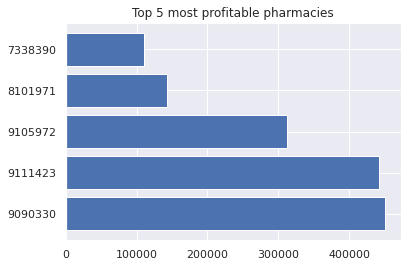

In [22]:
bars = df_sales5['Pharmacy number']
height = df_sales5['Sales']

y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Top 5 most profitable pharmacies')
plt.show()

There is a huge lead on these 2 pharmacies in total sales compared to all others.

**6.1.2** Seasonal sales

Total sales per season.

In [23]:
df_sales_s = df_jak_filter.groupby(['Season'])['CNK'].count().reset_index()
df_sales_s.columns=['Season','Sales']
df_sales_s.sort_values(by='Sales',ascending=False,inplace=True)
df_sales_s

,Season,Sales
2,autumn,728773
0,Spring,646520
1,summer,646512
3,winter,633169


Represented by a pie chart.

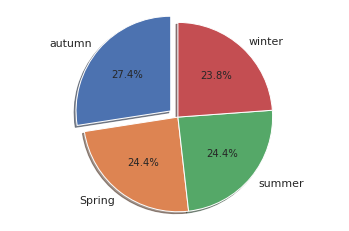

In [24]:
labels = df_sales_s['Season']
sizes = df_sales_s['Sales']
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Autumn is substantially stronger period compared to Winter as flu season is starting, but the duration of the cold season the prices drop for some reason.

**6.1.3** Gender distribution

In [25]:
df_gender_10 = df_jak_filter.groupby('Gender')['Sales'].count().reset_index()
df_gender_10.columns=['Gender','Sales']
df_gender_10

,Gender,Sales
0,Female,2256176
1,Male,1438719


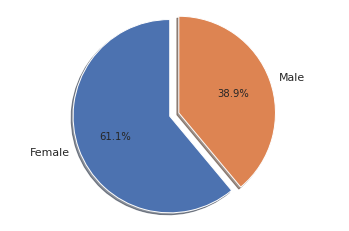

In [26]:
labels = df_gender_10['Gender']
sizes = df_gender_10['Sales']
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

According to the data, a majority of the sales are from the female side.

**6.1.4** Year of birth correlating to the total amount of sales

In [27]:
df_yob_10 = df_jak_filter.groupby('YOB')['Sales'].count().reset_index()
df_yob_10.columns=['YOB','Sales']
df_yob_10

,YOB,Sales
0,0,362
1,1898,1
2,1899,300
3,1900,2
4,1901,1
...,...,...
118,2025,15
119,2026,15
120,2027,18
121,2028,48


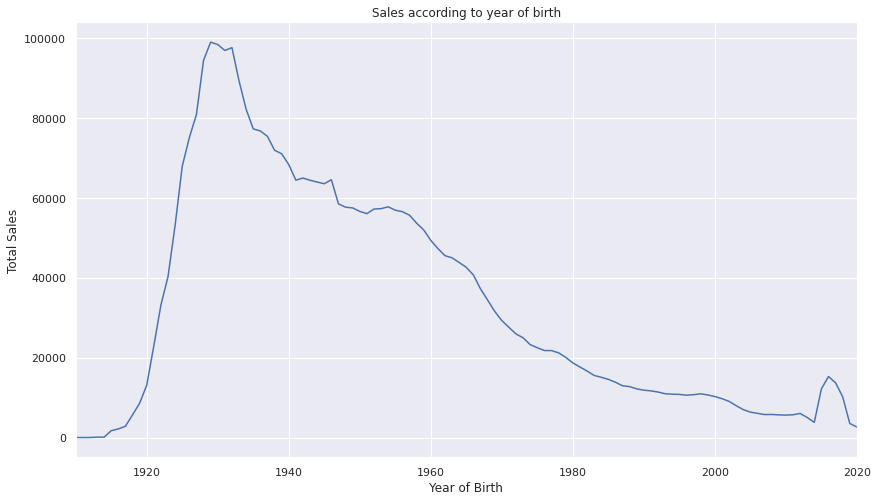

In [28]:
plt.figure(figsize=(14,8))

plt.plot(df_yob_10.YOB, df_yob_10.Sales)
plt.title('Sales according to year of birth')
plt.xlabel('Year of Birth')
plt.ylabel('Total Sales')
plt.xlim(1910, 2020)

plt.show()

The majority of the most profitable clients are born between 1925 and 1935 with a small weird spike around 2015-2019.

### 6.2.Region 20 (Nguyen)

Make the dataset smaller</font>

In [29]:
df_nguyen_filter.shape

(4290654, 16)

I had to take the region 20 and since it contains too much data so I only filter by the first 1000 samples and sort it by the Product Type.	

In [30]:
df_s = df_nguyen_filter.sample(1000).reset_index(drop=True)
df_s.head(2)

,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Unit,Price,Contribution,DateTime,date_offset,Season,Sales
0,07/27/2018,11:06,7686756,20,1952,Female,33076,CYCLOCUR DRAG 3X21,G03FB01,21,9.24,1.58,2018-07-27 11:06:00,407.0,summer,194.04
1,07/26/2019,14:12,7981002,20,1981,Male,5510276,BIJKOMEND HONORARIUM VOOR DE SUBSTITUTIEBEHAND...,,1,0.83,0.00,2019-07-26 14:12:00,406.0,summer,0.83


**6.2.1 Comparison between Product Type**


In [31]:
for i in range(0, len(df_s)):
    if ('honorarium' in df_s.loc[i, 'Product name'].lower()): 
        df_s.loc[i, 'ProductType'] = 'Honorarium'
    elif ('tabl' in df_s.loc[i, 'Product name'].lower()): 
        df_s.loc[i, 'ProductType'] = 'Tablet'
    else:
        df_s.loc[i, 'ProductType'] = 'Pills'
        
df_s.head()

,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Unit,Price,Contribution,DateTime,date_offset,Season,Sales,ProductType
0,07/27/2018,11:06,7686756,20,1952,Female,33076,CYCLOCUR DRAG 3X21,G03FB01,21,9.24,1.58,2018-07-27 11:06:00,407.0,summer,194.04,Pills
1,07/26/2019,14:12,7981002,20,1981,Male,5510276,BIJKOMEND HONORARIUM VOOR DE SUBSTITUTIEBEHAND...,,1,0.83,0.00,2019-07-26 14:12:00,406.0,summer,0.83,Honorarium
2,09/25/2017,15:57,8002245,20,1955,Female,2953099,DESLORATADINE SANDOZ 5 MG FILMOMH TABL 50 X ...,R06AX27,50,13.05,6.78,2017-09-25 15:57:00,605.0,autumn,652.50,Tablet
3,05/29/2019,10:46,7334325,20,1926,Male,2454726,NOVOMIX 50 PENFILL 100U/1ML 5 3ML,A10AD05,5,41.09,0.00,2019-05-29 10:46:00,209.0,Spring,205.45,Pills
4,11/15/2017,11:35,7334325,20,1933,Female,1184027,ZESTRIL 20 COMP 56X20MG,C09AA03,56,19.85,0.00,2017-11-15 11:35:00,795.0,autumn,1111.60,Pills


**Comparison plot**

Which is more expensive, medication, tablet or honorarium?

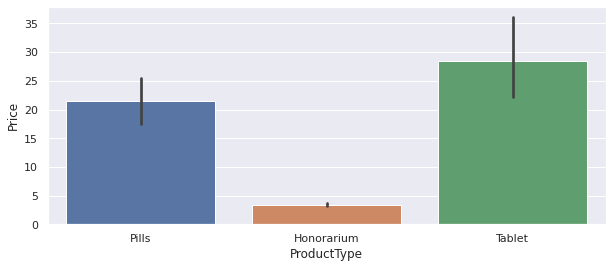

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x='ProductType', y='Price', data=df_s);

**6.2.2 Most expensive products:**

The chart below noted on which product has the highest income. The ten most expensive products have a price range between 250 and 1750.

In [33]:
df_price_top10 = df_s.sort_values(by='Price',ascending=False).head(10)

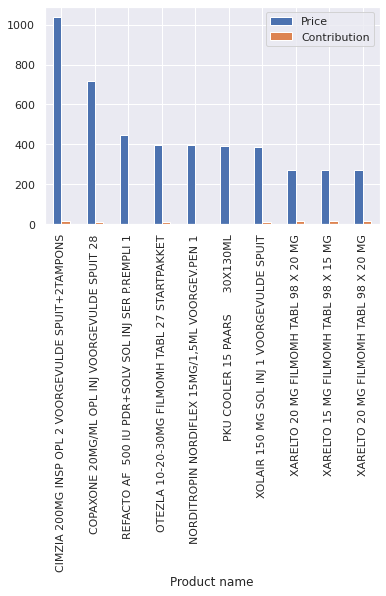

In [34]:
df_price_top10.set_index('Product name',inplace=True)
dfp=df_price_top10[['Price','Contribution']]
dfp.plot.bar()

****6.2.3 Year of birth based on gender****

Correlation plot

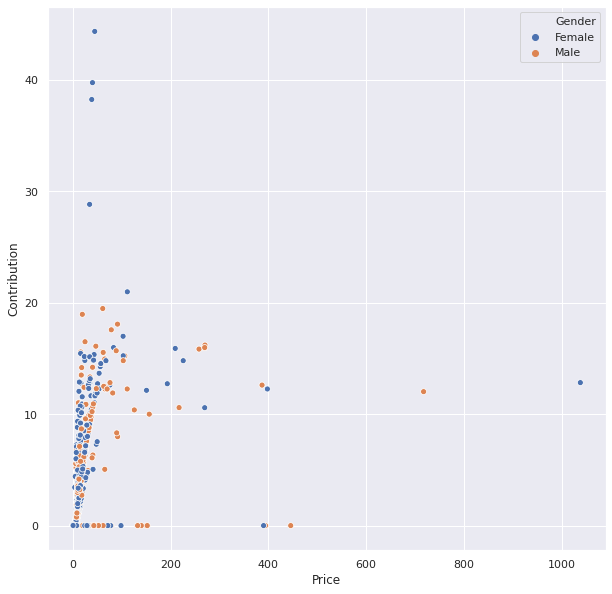

In [35]:
ax=plt.figure(figsize=(10,10))
sns.scatterplot(x='Price', y='Contribution', hue='Gender',data=df_s);

Looking at the age of these patients from region 20, male patients in the year of birth of 1940 and 1960 will most likely buy medications more than female from this year of birth in this region. Another remarkable thing is that females who are born in the 1920 would, would most likely buy medicines more than males. 

(1910.0, 2020.0)

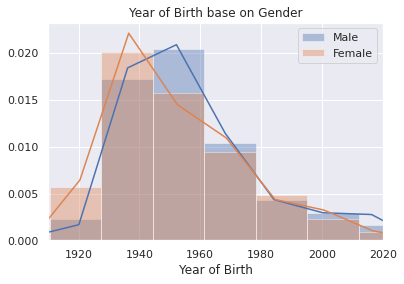

In [36]:
m_yob = df_nguyen_filter[df_nguyen_filter['Gender']=='Male']
f_yob = df_nguyen_filter[df_nguyen_filter['Gender']=='Female']

sns.set_style("darkgrid")

ax = sns.distplot(m_yob[['YOB']], bins = 120)
sns.distplot(f_yob[['YOB']], bins = 120)

plt.legend(['Male','Female','Neutral']);
plt.title('Year of Birth base on Gender')
plt.xlabel('Year of Birth')
plt.xlim(1910, 2020)

**6.2.4 Timelines**

There is a significant rise in sales of products in 05-2019. Another huge change in selling products is between May 2017 and September 2017.

In [37]:
df_sales=df_s.groupby(['DateTime'])['Price'].sum().reset_index()
df_sales.set_index('DateTime',inplace=True)
df_sales.head()

,Price
DateTime,
2017-01-02 10:33:00,125.37
2017-01-02 15:44:00,11.48
2017-01-03 10:24:00,7.68
2017-01-03 14:29:00,7.62
2017-01-09 00:00:00,11.95


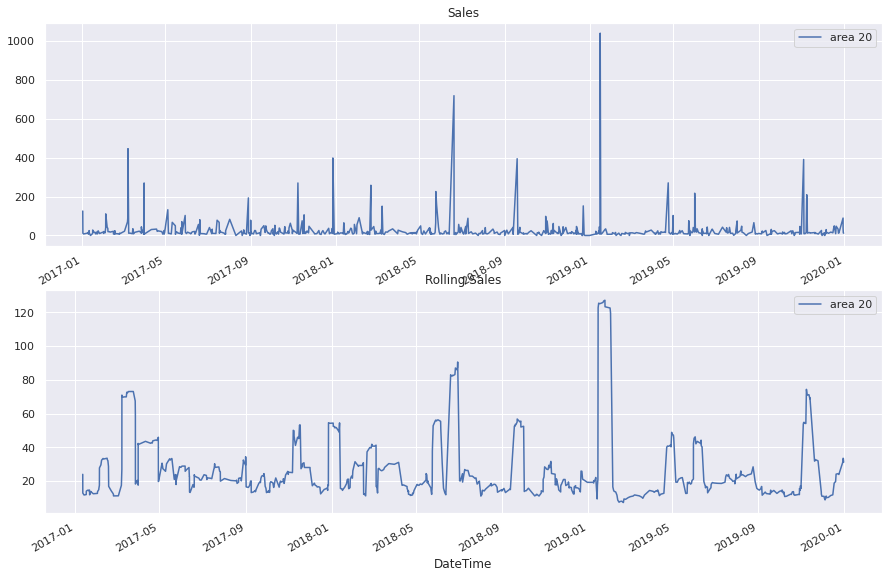

In [38]:
fig, ax = plt.subplots(2, 1,figsize=(15,10))
df_sales['Price'].plot(ax=ax[0],color="#4C72B0")
ax[0].set_title("Sales")
ax[0].legend(["area 20"])

df_sales['rp']=df_sales['Price'].rolling(10).mean()
df_sales['rp'].plot(ax=ax[1],color="#4C72B0")
ax[1].set_title("Rolling Sales")
ax[1].legend(["area 20"]);

### 6.3.Region 22 (Mitchel)

The part that is analysed in this chapter is pharmacy postcode 22. This postcode lies in the region of Antwerp.

#### 6.3.1.Seasonal Analysis

In this chapter we will take a look at all the data we can find that is related to the four seasons. As we can see there is not much of a difference between the total products that have been sold per season. in de data below.

In [39]:
df_prices = df_mitchel_filter.groupby("Season")["Product name"].count()
df_prices.sort_values()

Season
summer    164215
Spring    166218
winter    174461
autumn    183346
Name: Product name, dtype: int64

The barplot above indicated that there is not much difference in the amount of products sold per season. It does show that in the autumn season more has been bought.

This data can also be split per gender type as seen in the plot below. This plot indicates that female customers have been buying more than male customer in every season.

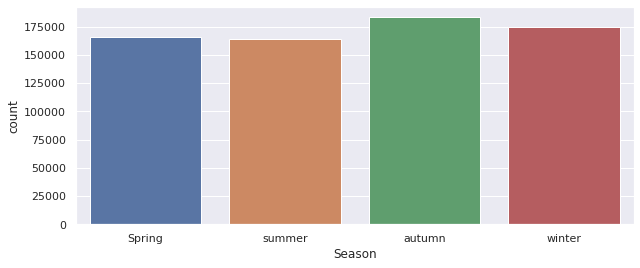

In [40]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'Season', data = df_mitchel_filter);

#### 6.3.2.Age & Gender

for the genders we would like to see how old the customers are. This could help us see the average age of the customers and predict what products are bought mostly be specific age groups.

In [41]:
YearCount = df_mitchel_filter.groupby(['Gender', 'YOB'])['Season'].count().reset_index()

YearCount.columns = ['Gender', 'YOB', 'Count']
YearCount.sort_values(by = 'Count', ascending = False, inplace = True)

YearCount.head(10)

,Gender,YOB,Count
35,Female,1945,7265
143,Male,1947,7242
37,Female,1947,7233
36,Female,1946,7207
38,Female,1948,7161
144,Male,1948,7149
147,Male,1951,7129
34,Female,1944,7078
49,Female,1959,7066
145,Male,1949,7063


All the customers have been grouped per year and gender. Now we are able to put this in a plot and see what years the customers are born the most frequent.

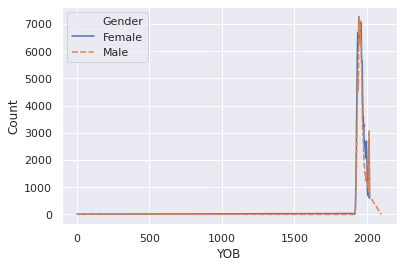

In [42]:
sns.lineplot(x = 'YOB', y = 'Count', hue = 'Gender', style = 'Gender', data = YearCount)
plt.show()

As we can see, the ages are not entirely correct. This means we will only look at the ages that could be alive at the moment. This can be seen in the plot below:

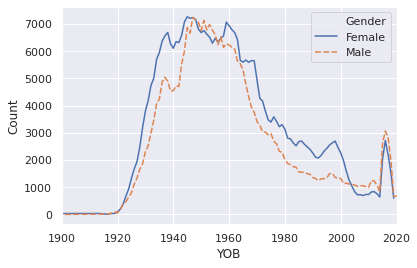

In [43]:
ax = sns.lineplot(x = 'YOB', y = 'Count', hue = 'Gender', style = 'Gender', data = YearCount)
ax.set_xlim(1900,2020)
plt.show()

#### 6.3.3.Prices & Contribution

In the multiple scatterplots shown below we can see the correlation between the price and contributions per gender and season. This could show us what connections could be found between the contribution and prices per gender and season.

<Figure size 1440x1440 with 0 Axes>

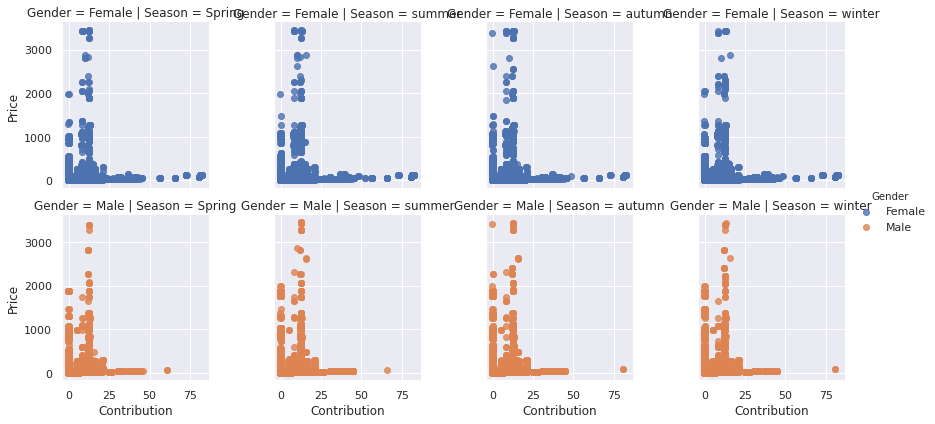

In [44]:
ax = plt.figure(figsize = (20, 20))
g = sns.FacetGrid(df_mitchel_filter, col = 'Season', row = 'Gender' , hue = 'Gender')
g.map(sns.regplot, 'Contribution', 'Price', fit_reg = False, x_jitter = .1)
g.add_legend()

### 6.4.Region 30 (Nikita)

In [45]:
df_nikita_filter.head(10)

,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Unit,Price,Contribution,DateTime,date_offset,Season,Sales
742,01/01/2018,00:00,7981002,30,1926,Female,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,1,3.09,0.00,2018-01-01,1081.0,winter,3.09
743,01/01/2018,00:00,7729509,30,1927,Female,5520465,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,,1,3.09,0.00,2018-01-01,1081.0,winter,3.09
744,01/01/2018,00:00,7729509,30,1930,Female,708099,GLUCOPHAGE COMP 1 X 850 MG,A10BA02,1,0.03,0.00,2018-01-01,1081.0,winter,0.03
745,01/01/2018,00:00,7981002,30,1927,Female,743294,L THYROXINE CHRISTIAENS COMP 1 X 100 MCG,H03AA01,1,0.04,0.01,2018-01-01,1081.0,winter,0.04
746,01/01/2018,00:00,7729509,30,1929,Female,743294,L THYROXINE CHRISTIAENS COMP 1 X 100 MCG,H03AA01,1,0.04,0.01,2018-01-01,1081.0,winter,0.04
747,01/01/2018,00:00,7729509,30,1927,Female,743294,L THYROXINE CHRISTIAENS COMP 1 X 100 MCG,H03AA01,1,0.04,0.01,2018-01-01,1081.0,winter,0.04
748,01/01/2018,00:00,7729509,30,1926,Female,743294,L THYROXINE CHRISTIAENS COMP 1 X 100 MCG,H03AA01,1,0.04,0.01,2018-01-01,1081.0,winter,0.04
749,01/01/2018,00:00,7729509,30,1926,Female,753061,QUETIAPIN SANDOZ COMP 1 X 100 MG,N05AH04,1,0.34,0.08,2018-01-01,1081.0,winter,0.34
750,01/01/2018,00:00,7729509,30,1928,Female,753061,QUETIAPIN SANDOZ COMP 1 X 100 MG,N05AH04,1,0.35,0.08,2018-01-01,1081.0,winter,0.35
751,01/01/2018,00:00,7729509,30,1926,Female,782219,CYMBALTA CAPS MAAGSAPRESIST 1 X 60 MG,N06AX21,1,0.45,0.13,2018-01-01,1081.0,winter,0.45


I am going to describe the post code of 30 which is Leuven which is the capital and largest city of the province of Flemish Brabant in the Flemish Region of Belgium.

In [46]:
df_nikita_filter = df_nikita_filter[df_nikita_filter['Pharmacy postcode'] == 30]

df_postcode = df_nikita_filter.groupby("Gender")["Product name"].count()
df_postcode

Gender
Female    943776
Male      644168
Name: Product name, dtype: int64

Text(0.5, 1.0, 'Gender sold medicines')

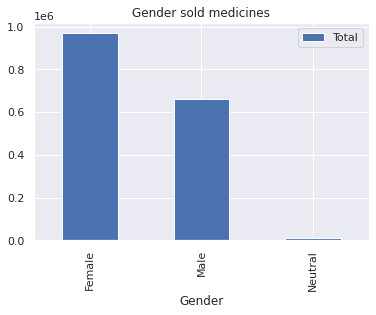

In [47]:
from pandas import DataFrame
datagender = {'Gender': ['Female','Male','Neutral'],
        'Total': [969246,661576,11148]}
  
dfgender = DataFrame(datagender,columns=['Gender','Total'])
dfgender.plot(x ='Gender', y='Total', kind = 'bar')
plt.title('Gender sold medicines')

The graph shows the distribution in purchasing the medicine between Female, male and neutral genders. As you can see in the region of Leuven women purchased 30 thousand more medicine than men. 


In [48]:
df_season = df_nikita_filter.groupby(['Season'])['Product name'].count().reset_index()

df_season.columns=['Season', 'Total Product']
df_season.sort_values(by='Total Product',ascending=False,inplace=True)
df_season

,Season,Total Product
2,autumn,316357
3,winter,290758
0,Spring,279268
1,summer,272182


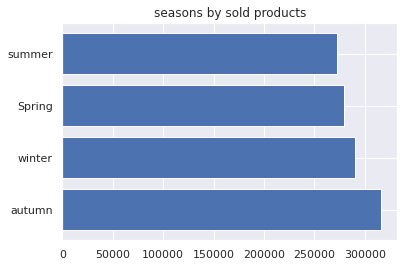

In [49]:
df_season = df_nikita_filter.groupby(['Season'])['Product name'].count().reset_index()

df_season.columns=['Season', 'Total Product']
df_season.sort_values(by='Total Product',ascending=False,inplace=True)
df_season

bars = df_season['Season']
height = df_season['Total Product']

y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('seasons by sold products')
plt.show()

The above graph shows when the purchased of the medicine is usually accurate. The figures are similar for each of the season. However, during the summer people purchase the least amount of medicine. We can assume that people are less likely to get ill because the weather is warm and dry compared to another season. 

In [50]:
df_products = df_nikita_filter.groupby(['Price','Product name'])['Gender'].count().reset_index()

df_products.columns=['Price','Product name','Counts']
df_products.sort_values(by='Counts',ascending=False,inplace=True)
df_products10 = df_products.head(10)
df_products10

,Price,Product name,Counts
4374,3.09,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,19783
4371,3.04,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,17135
3459,0.03,ASAFLOW COMP 1 X 80 MG,15392
3661,0.12,BURINEX COMP 1 X 1 MG,9290
3496,0.05,"BISOPROLOL EG COMP 1 X 2,5 MG",8173
7241,10.03,ASAFLOW 80MG MAAGSAPRES COMP BLI 168X 80MG,6677
4381,3.14,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,6593
7169,9.95,ASAFLOW 80MG MAAGSAPRES COMP BLI 168X 80MG,6456
9213,13.28,"ALPHARIX-TETRA SER INJ 0,5 ML 2017",5658
5960,8.25,BURINEX COMP 30 X 1 MG,5354


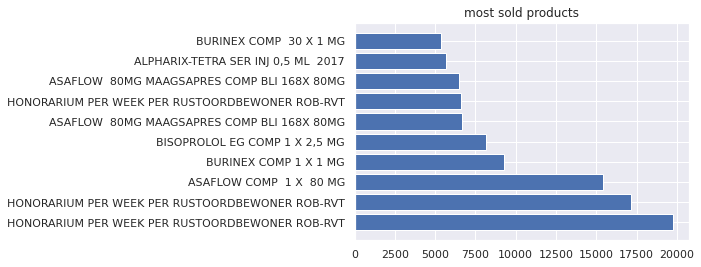

In [51]:
df_products = df_nikita_filter.groupby(['Price','Product name'])['Gender'].count().reset_index()

df_products.columns=['Price','Product name','Counts']
df_products.sort_values(by='Counts',ascending=False,inplace=True)
df_products10 = df_products.head(10)

bars = df_products10['Product name']
height = df_products10['Counts']

y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('most sold products')
plt.show()


The most sold medicines are Honorarium (in different variations), Bisoprolol for heart diseases, Asaflow (in different variations)which is also preventing some cardiovascular diseases, Burinex is a medicine used to treat swelling and high blood pressure,  and last but not the least is Alphrix-tetra medicine which is used against flu. 

### 6.5.Region 40 (Mailinh)

To divide the work, we first had to take a look where most of the medications are being sold in which region. In this case, the top 5 regions are: number 20, 10, 30, 40 and 22. I had to do my EDA on region 40.

The postcode 40 is from the province of Liege, the capital city Liege. The population is quite high, Liege is ranking 4th as the most populated city in Belgium with 197355 people living in the city in 2019. That is the reason why the amount of sold products is quite high in this region.

In [52]:
df_mailinh_filter.head(10)


,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Unit,Price,Contribution,DateTime,date_offset,Season,Sales
10,01/01/2017,00:00,7641438,40,1949,Female,1676626,CIPROFLOXACINE SANDOZ 500MG TABL 20 NEW SANDOZ,J01MA02,20,17.31,4.34,2017-01-01,1081.0,winter,346.20
11,01/01/2017,00:00,7641438,40,1948,Female,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90
18,01/01/2017,00:00,7641438,40,1956,Female,278192,"CLEXANE SPUIT INJ 10 X 40 MG/0,4 ML",B01AB05,10,41.53,10.92,2017-01-01,1081.0,winter,415.30
19,01/01/2017,00:00,8272695,40,1959,Female,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90
21,01/01/2017,00:00,7641438,40,1961,Male,1458736,AUGMENTIN 875 MG COMP 10X875MG,J01CR02,10,10.14,1.14,2017-01-01,1081.0,winter,101.40
23,01/01/2017,00:00,7641438,40,1961,Male,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90
31,01/01/2017,00:00,7641438,40,1967,Male,1525500,AMOXICILLINE SANDOZ 500 MG TABL DISP 16,J01CA04,16,7.06,0.79,2017-01-01,1081.0,winter,112.96
39,01/01/2017,00:00,7341765,40,1972,Female,2131514,LAMBIPOL TABL DISP 60 X 200 MG,N03AX09,60,71.76,12.02,2017-01-01,1081.0,winter,4305.60
40,01/01/2017,00:00,7641438,40,1969,Female,3183092,CYMBALTA 60 MG MAAGSAPRESIST. CAPS 98 X 60 MG,N06AX21,98,53.30,13.67,2017-01-01,1081.0,winter,5223.40
41,01/01/2017,00:00,7641438,40,1971,Female,5520523,WACHTHONORARIUM,,1,4.90,0.00,2017-01-01,1081.0,winter,4.90


### Gender

In the code below, I want to take a look a look which gender would most likely buy medications more often in region 40.


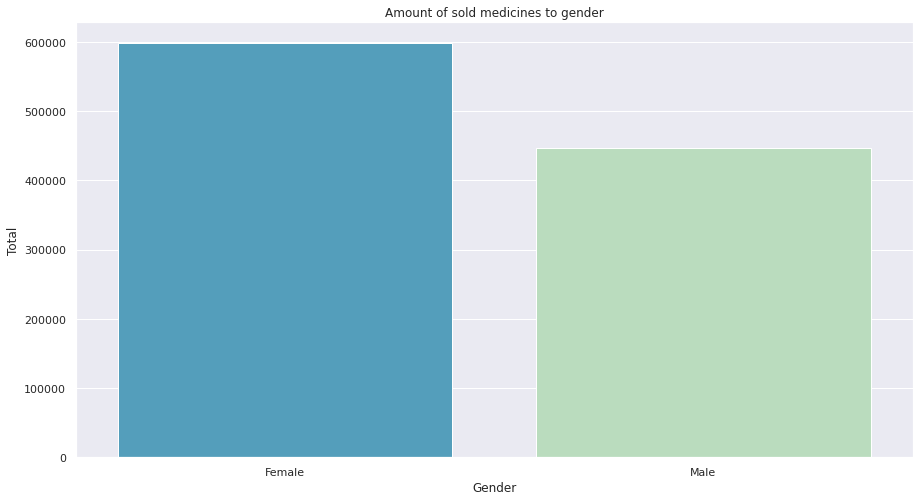

In [53]:
df_by_gender = df_mailinh_filter.groupby("Gender")["Product name"].count().reset_index()
df_by_gender.columns=['Gender', 'Total']
df_by_gender.sort_values(by='Total',ascending=False,inplace=True)

plt.figure(figsize=(15,8))
plt.xticks(rotation = 0)
plt.title('Amount of sold medicines to gender')
states_plot = sns.barplot(x=df_by_gender['Gender'],y=df_by_gender['Total'], palette="GnBu_r")
plt.show()

Females would more likely buy medications than males according to the dataset. The amount of products sold to females is 614182, while the amount of products sold to males were only 458473.



(1910.0, 2020.0)

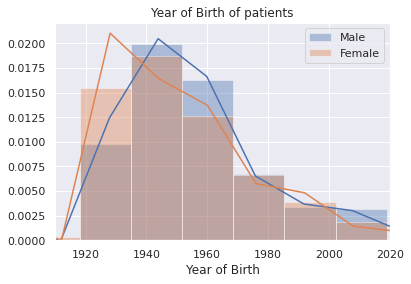

In [54]:
## I want to see which age group by which gender will most likely buy medications more 
## source: https://seaborn.pydata.org/generated/seaborn.countplot.html
## source: https://seaborn.pydata.org/generated/seaborn.distplot.html
import seaborn as sns

m_yob = df_mailinh_filter[df_mailinh_filter['Gender']=='Male']
f_yob = df_mailinh_filter[df_mailinh_filter['Gender']=='Female']

sns.set_style("darkgrid")

ax = sns.distplot(m_yob[['YOB']], bins = 120)
sns.distplot(f_yob[['YOB']], bins = 120)

plt.legend(['Male','Female','Neutral']);
plt.title('Year of Birth of patients')
plt.xlabel('Year of Birth')
plt.xlim(1910, 2020)

But looking at the age of these patients, male patients in the year of birth of 1940 and 1960 will most likely buy medications more than female from this year of birth in this region. Another remarkable thing is that females who are born in the 1920 would, would most likely buy medicines more than males.



### Medication Products¶


In this chapter, I want to see the division of the amount of medication products being sold. So in other words to see which products are being sold more. So in the code below, we are going to see the top 5 medication products that is being sold the most.



In [55]:
## Here we want to see the top 5 most sold products in region 40 
df_products = df_mailinh_filter.groupby(['Price','Product name'])['Gender'].count().reset_index()

df_products.columns=['Price','Product name','Counts']
df_products.sort_values(by='Counts',ascending=False,inplace=True)
df_products5 = df_products.head(5)
df_products5

,Price,Product name,Counts
3607,3.14,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,12792
3604,3.09,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,12720
3601,3.04,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,12002
2833,0.03,ASAFLOW COMP 1 X 80 MG,11598
3018,0.12,BURINEX COMP 1 X 1 MG,6815


It seems that honorarium is the most popular. As you can see in the table above there are 3 different kinds of honorarium because of the different prices.



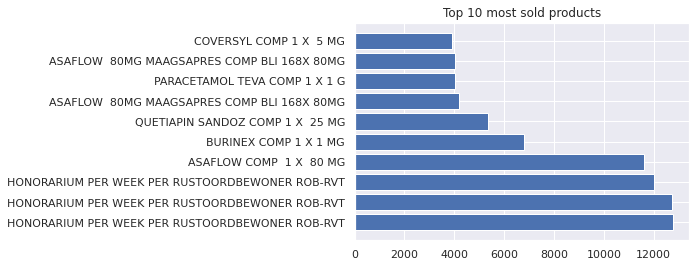

In [56]:
df_products = df_mailinh_filter.groupby(['Price','Product name'])['Gender'].count().reset_index()

df_products.columns=['Price','Product name','Counts']
df_products.sort_values(by='Counts',ascending=False,inplace=True)
df_products5 = df_products.head(10)

bars = df_products5['Product name']
height = df_products5['Counts']

y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Top 10 most sold products')
plt.show()

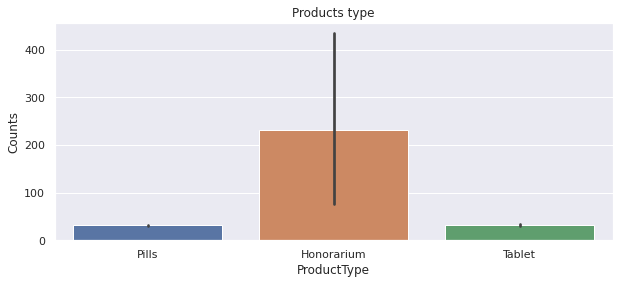

In [57]:
df_productstype = df_mailinh_filter.groupby(['Season','Product name'])['Gender'].count().reset_index()
df_productstype.columns=['Season','Product name','Counts']
df_productstype.sort_values(by='Counts',ascending=False,inplace=True)

for i in range(0, len(df_productstype)):
    if ('honorarium' in df_productstype.loc[i, 'Product name'].lower()): 
        df_productstype.loc[i, 'ProductType'] = 'Honorarium'
    elif ('tab' in df_productstype.loc[i, 'Product name'].lower()): 
        df_productstype.loc[i, 'ProductType'] = 'Tablet'
    else:
        df_productstype.loc[i, 'ProductType'] = 'Pills'
plt.figure(figsize=(10,4))
plt.title("Products type")
sns.barplot(x='ProductType', y='Counts', data=df_productstype);

To dive more into the medications, we want to see what kind of medications are popular in this pharmacy region. It seems that pills is the most popular in region 40, second place is tablets that is being sold the second best



### Season¶

To help us to find a better overview of the sales per year, we want to see in which season which medications are being sold the most.



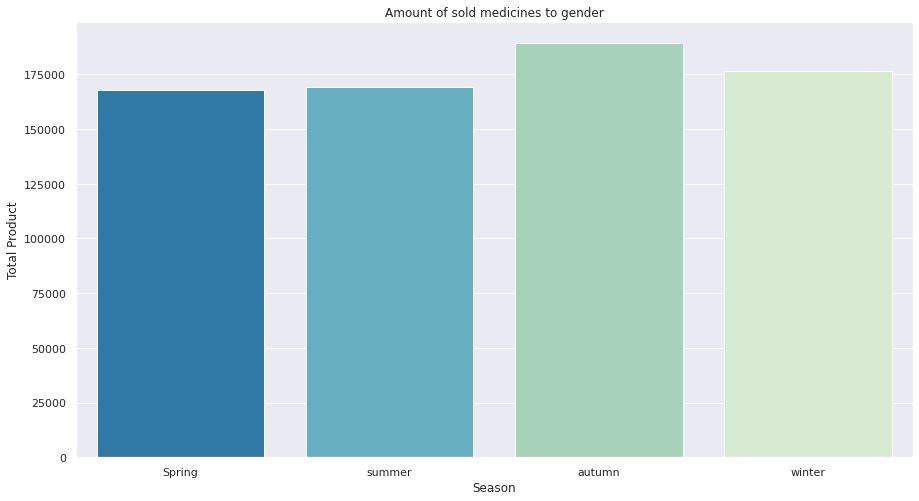

In [58]:
df_season = df_mailinh_filter.groupby(['Season'])['Product name'].count().reset_index()

df_season.columns=['Season', 'Total Product']
df_season.sort_values(by='Total Product',ascending=False,inplace=True)
df_season_totalproduct = df_season['Total Product']

plt.figure(figsize=(15,8))
plt.xticks(rotation = 0)
plt.title('Amount of sold medicines to gender')
states_plot = sns.barplot(x=df_season['Season'],y=df_season_totalproduct, palette="GnBu_r")
plt.show()

In this case, it’s the fall season where the pharmacy sells most of its products. As you can see in the table below, the hotter the weather, the less likely people would buy medications. In the summer, the pharmacy doesn’t sell a lot of medications compared to the fall. But then again, in the fall season people would most likely buy medications more than winter.



### Clinic in region 40¶


Below we can see the amount products being sold by each clinic in region 40. It seems that clinic number 7894359 is selling the most compared to others.



In [59]:
df_clinic = df_mailinh_filter.groupby("Pharmacy number")["Product name"].count().reset_index()
df_clinic.columns=['Pharmacy number','Total of sold products']
df_clinic.sort_values(by='Total of sold products',ascending=False,inplace=True)

df_clinic.head(5)

,Pharmacy number,Total of sold products
140,7894359,290777
185,7991232,101790
238,9068022,66590
57,7641438,62878
6,4354302,61411


Below we can see the amount products being sold by each clinic in region 40. It seems that clinic number 7894359 is selling the most compared to others. 

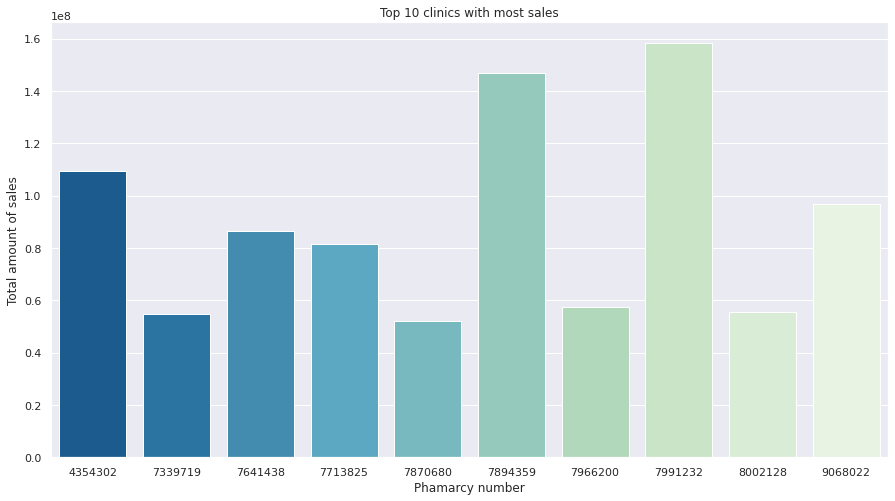

In [60]:
df_clinic_sales = df_mailinh_filter.groupby("Pharmacy number")['Sales'].sum().reset_index()
df_clinic_sales.columns = ['Phamarcy number', 'Total amount of sales']
df_clinic_sales.sort_values(by='Total amount of sales',ascending=False,inplace=True)
df_clinic_sales = df_clinic_sales.head(10)

plt.figure(figsize=(15,8))
plt.xticks(rotation = 0)
plt.title('Top 10 clinics with most sales')
states_plot = sns.barplot(x=df_clinic_sales['Phamarcy number'],y=df_clinic_sales['Total amount of sales'], palette="GnBu_r")
plt.show()